# ARIMA 

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Zadanie 1
Wczytaj dane "Shampoo Sales Dataset", które opisują miesięczną liczbę sprzedaży szamponu przez okres 3 lat.

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('data/sales-of-shampoo-over-a-three-ye.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
rng1 = pd.date_range('1901-01-01', periods=len(series), freq='M')
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


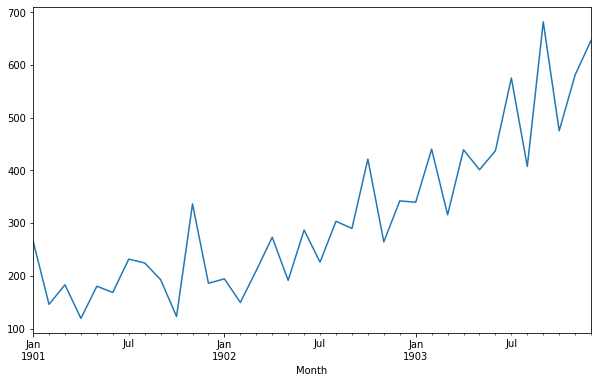

In [4]:
plt.figure(figsize=(10,6))
series.plot()
plt.show()

Po pierwsze, będziemy testować nasze modele na ostatnim roku. Biorąc pod uwagę dane miesięczne, oznacza to, że 12 ostatnich obserwacji zostanie wykorzystanych jako zbiór testowy.

W celu oceny skuteczności modelu, zastosujemy metodę walidacji walk-forward. Oznacza to, że nauczymy model na danych historycznych. Będziemy prognozować najbliższy punkt i oceniać poziom predykcji. Obserwacja zostanie następnie dodana do zestawu danych uczących i proces powtórzony.


In [5]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
X = series.values
train, test = X[0:-12], X[-12:]

In [7]:
print(series.index)
rng1 = pd.date_range('1900-12-01', periods=len(X)-12, freq='M').shift(1, freq='D')
rng2 =pd.date_range('1902-12-01', periods=12, freq='M').shift(1, freq='D')
print(rng1)
print(rng2)

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)
DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
             

In [8]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
trainS=pd.Series(train, index=rng1)
testS=pd.Series(test,index=rng2)

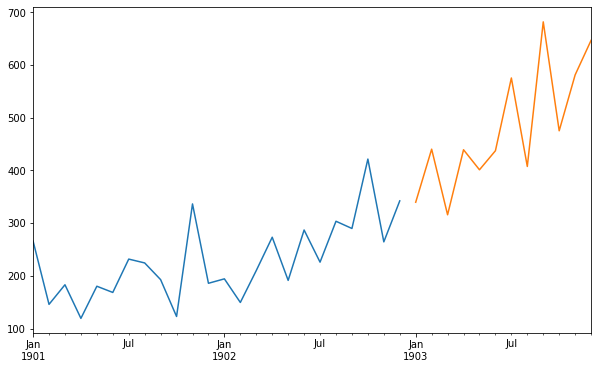

In [9]:
plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
plt.show()

# Zadanie 1
Naucz modela ARIMA(4,1,0)

Test RMSE: 84.832


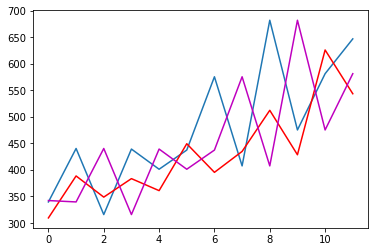

In [16]:
history = [x for x in train]
predictions = []
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(series['1902-12':'1903-11'].values, 'm')
plt.show()

In [14]:
rmse_naive = sqrt(mean_squared_error(test, series['1902-12':'1903-11'].values))

rmse_naive

136.76131884905664

In [23]:
model_fit.forecast()

(array([543.53894907]),
 array([63.82919206]),
 array([[418.43603147, 668.64186667]]))

In [13]:
predictions

[array([309.59066404]),
 array([388.64159473]),
 array([348.77806403]),
 array([383.60199319]),
 array([360.99200969]),
 array([449.3421064]),
 array([395.44930114]),
 array([434.86484322]),
 array([512.3020267]),
 array([428.59745117]),
 array([625.99351302]),
 array([543.53894907])]

# Zadanie 2
Zwizualizuj na jednym wykresie dane trenujące, testujące i wartości przewidziane przez model

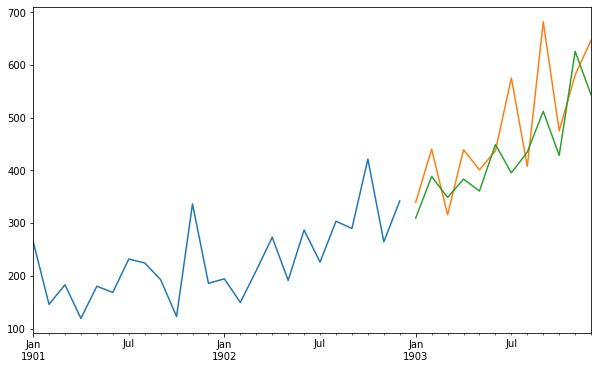

In [14]:
pre=pd.Series(np.stack(predictions,1)[0], index=testS.index)

plt.figure(figsize=(10,6))
trainS.plot()
testS.plot()
pre.plot()
plt.show()

# Jeżeli nie będe uczył co krok

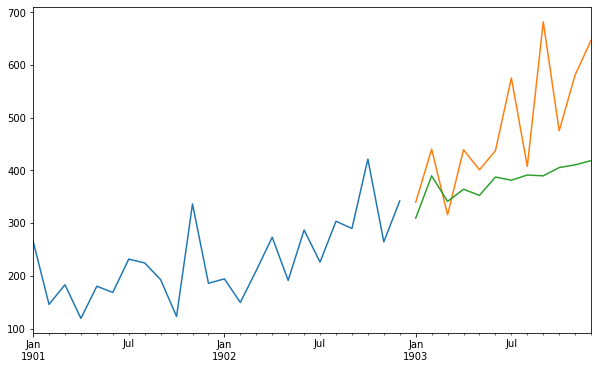

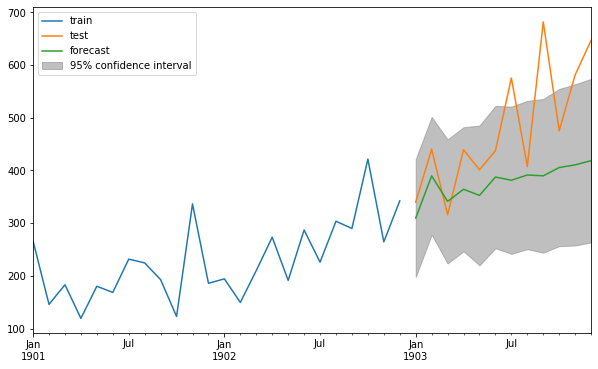

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(trainS, order=(4,1,0))
model_fit = model.fit()

predictions1 = model_fit.predict(start='1903-01-01',end='1903-12-01', dynamic=True, typ ='levels')
predictions = []
# for t in range(len(test)):
#     predictions.append(model_fit.forecast()[0][0])
# predictionsS=pd.Series(predictions,index=rng2)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
predictions1.plot()
plt.show()


fig, ax = plt.subplots()
ax = trainS.plot(label="train")
ax = testS.plot(label="test")
fig = model_fit.plot_predict(start='1903-01-01',end='1903-12-01', dynamic=True, ax=ax, plot_insample=False)
fig.set_size_inches([10,6])
plt.show()

# Zadanie 3
Naucz model:

    - (2,1,1)
    - (4,2,1)
    - (5,1,0)
    - (6,1,1)

D:\Programy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Programy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Programy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Programy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Programy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Programy\anaconda3\lib\site-packages\statsmodels\base\model.py:568: Co

Test RMSE for ARMIA(2, 1, 1): 91.661
Test RMSE for ARMIA(4, 2, 1): 69.403
Test RMSE for ARMIA(5, 1, 0): 86.800
Test RMSE for ARMIA(6, 1, 1): 71.969


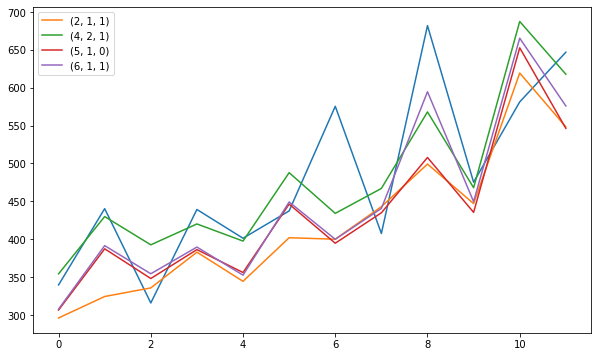

In [16]:
history = [x for x in train]
# walk-forward validation
orders = [(2,1,1), (4,2,1), (5,1,0), (6,1,1)]
predictions = {0:[],1:[],2:[],3:[]}
for t in range(len(test)):
    # fit model
    for i, o in enumerate(orders):
        model = ARIMA(history, order=o)
        model_fit = model.fit()
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions[i].append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse={}
plt.figure(figsize=[10,6])
plt.plot(test)
for i, o in enumerate(orders):
    rmse[i] = sqrt(mean_squared_error(test, predictions[i]))
    print('Test RMSE for ARMIA'+str(o)+': %.3f' % rmse[i])
    # plot forecasts against actual outcomes
    plt.plot(predictions[i], label=str(o))
plt.legend()
plt.show()

# Zadanie 4

Wykonaj ARIMA(4,1,3) na poniższych danych. Weź dane z lat 1720-1950 jako dane trenujące i z lat 1951-2008 jako dane testujące.

In [6]:
from pandas import Series
series = pd.read_csv('data/sunspots.csv', index_col = 'YEAR', squeeze = True)
series.head()

YEAR
1700     5.0
1701    11.0
1702    16.0
1703    23.0
1704    36.0
Name: SUNACTIVITY, dtype: float64

In [7]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

In [8]:
trainS=series.loc['1720':'1950']
testS=series.loc['1951':'2008']

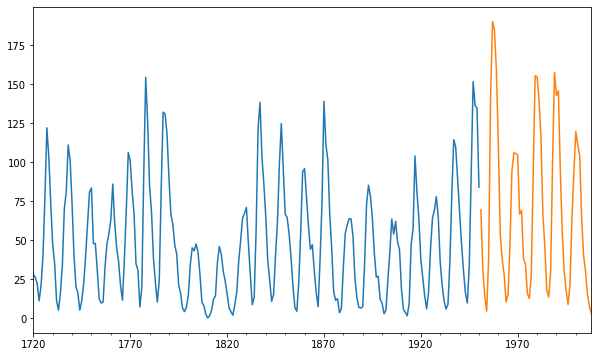

In [115]:
plt.figure(figsize=(10,6));
trainS.loc['1720':'1950'].plot()
testS.loc['1951':'2008'].plot()
plt.show()

D:\Programy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test RMSE: 21.026


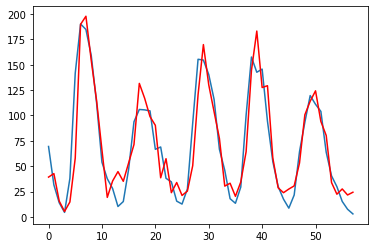

In [131]:
history = [x for x in trainS.values]
predictions = []
# walk-forward validation
for t in range(len(testS)):
    # fit model
    model = ARIMA(history, order=(4,1,3))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(testS.values[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(testS, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(testS.values)
plt.plot(predictions, color='red')
plt.show()

# Zadanie 5

Wykonaj ARIMA(2,1,2) na poniższych danych. Weź pierwsze 2000 wartości jako dane trenujące, a pozostałe jako dane testujące.

In [10]:
from pandas import Series
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

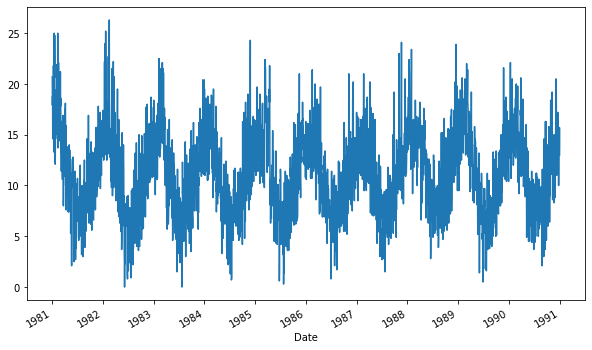

In [11]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [12]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [13]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


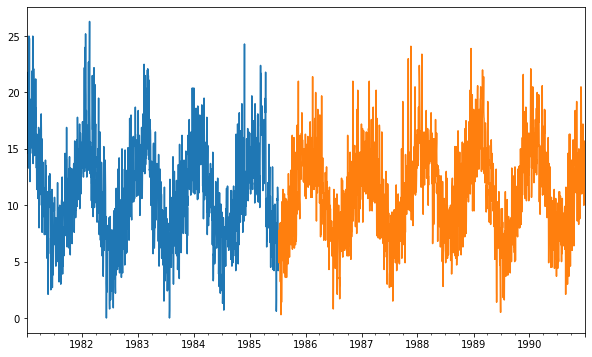

In [14]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
plt.show()

In [15]:
print(len(train))
print(len(test))

1646
2001


Test RMSE: 2.439


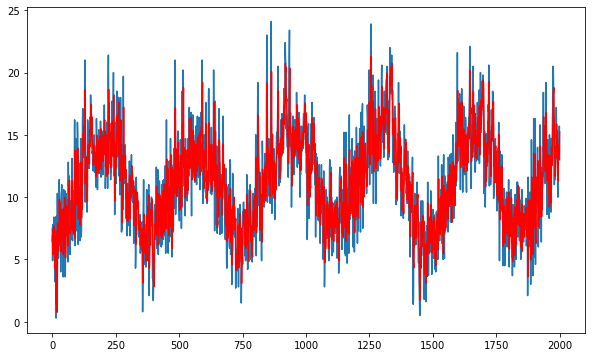

In [152]:
history = [x for x in train]
predictions = []
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=[10,6])
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

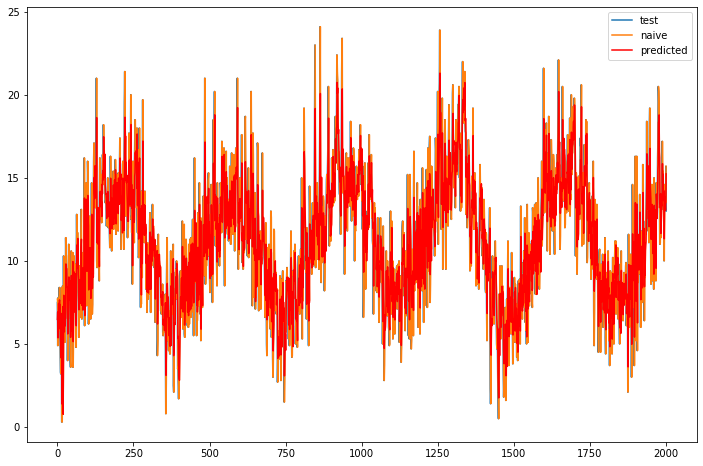

In [153]:
test1 = X[len(X)-2002:-1]
plt.figure(figsize=[12,8])
plt.plot(test,label='test')
plt.plot(test1,label='naive')
plt.plot(predictions, color='red', label='predicted')
plt.legend()
plt.show()

In [142]:
rmse1 = sqrt(mean_squared_error(test, test1))
print(rmse1)

2.6593624979592807


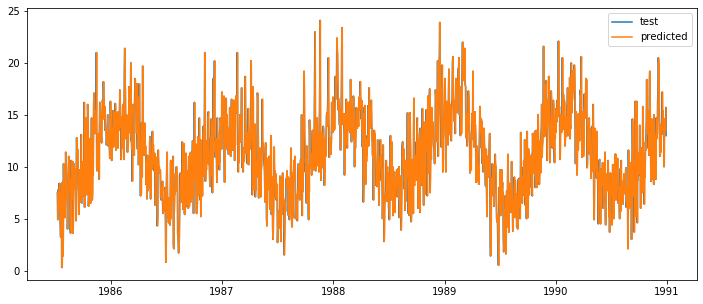

In [21]:
plt.figure(figsize=[12,5])
plt.plot(rng2,test, label='test')
plt.plot(rng2[1:],test[:-1],label='predicted')
plt.legend()